In [1]:
!pip install keras
!pip install tensorflow

In [2]:
pwd

'/home/wsuser/work'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from keras.datasets import mnist
imgs = mnist
(X_train, y_train), (X_test, y_test) = imgs.load_data()

11501568/11490434 [==============================] - 0s 0us/step


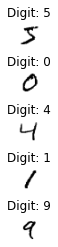

In [9]:
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title("Digit: {}".format(y_train[i]))
    plt.subplots_adjust(hspace=1.0)
    plt.axis('off')

In [10]:
print('Training Dataset Shape: ', X_train.shape)
print('Test Dataset Shape: ', X_test.shape)

Training Dataset Shape:  (60000, 28, 28)
Test Dataset Shape:  (10000, 28, 28)


In [11]:
print('Encoded Image data: ')
print(X_train[0])

Encoded Image data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
print('Image Data after normalising: ')
print(X_train[0])

Image Data after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [17]:
model = Sequential()

In [18]:
# imput layer
model.add(Flatten(input_shape=(28, 28)))

# hidden layer 1
model.add(Dense(512, activation='relu'))

# hidden layer 2
model.add(Dense(512, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [19]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1841 - accuracy: 0.9444
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0793 - accuracy: 0.9754
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0583 - accuracy: 0.9816
Epoch 4/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 6/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 8/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 9/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 10/50
1875/1875 [==============================] - 18s 10ms/

In [21]:
model.save('digit_recog.h5')

In [22]:
!tar -zcvf project.tgz digit_recog.h5

digit_recog.h5


In [23]:
ls -l

total 14972
-rw-rw---- 1 wsuser wscommon 8070920 Nov 18 10:48 digit_recog.h5
-rw-rw---- 1 wsuser wscommon 7254578 Nov 18 10:49 project.tgz


In [24]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 15.5 MB/s eta 0:00:01


In [25]:
from ibm_watson_machine_learning import APIClient

In [26]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "Uw_y8nqHR4RjQyzRGl-D9UkMeARMgr89gDYrv2fi-_Xh"
}

client = APIClient(wml_credentials)

In [27]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [28]:
space_uid = guid_from_space_name(client, "handwritten_digit_recog_NT")
print("Space UID = " + space_uid)

Space UID = 14d044cb-f02e-4172-9fb2-5ffa0a48d5a4


In [29]:
client.set.default_space(space_uid)

'SUCCESS'

In [30]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [31]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
print("software_spec_uid: ", software_spec_uid)

software_spec_uid:  12b83a17-24d8-5082-900f-0ab31fbfd3cb


In [34]:
model_details = client.repository.store_model(model='project.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_id(model_details)
print(model_id)

8b3134db-4212-4cdb-b788-59a1b6943190


In [35]:
model_metrics = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss: ", model_metrics[0])
print("Test Accuracy: ", model_metrics[1])

313/313 - 1s - loss: 0.2407 - accuracy: 0.9843 - 1s/epoch - 5ms/step
Test Loss:  0.240699902176857
Test Accuracy:  0.9843000173568726


Predicted value:  7
Prediction successful
Predicted value:  2
Prediction successful
Predicted value:  1
Prediction successful
Predicted value:  0
Prediction successful
Predicted value:  4
Prediction successful


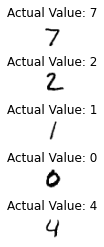

In [41]:
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.imshow(X_test[i], cmap='gray_r')
    plt.title("Actual Value: {}".format(y_test[i]))
    prediction = model.predict(X_test)
    plt.axis('off')
    plt.subplots_adjust(hspace=1.0)
    print('Predicted value: ', np.argmax(prediction[i]))
    if(y_test[i] == np.argmax(prediction[i])):
        print('Prediction successful')
    else:
        print('Prediction unsuccessful')

In [42]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [43]:
def load_image(filename):
    img = load_img(filename, target_size=(28, 28), grayscale=True)
    img = img_to_array(img)
    img = img.reshape(1, 28, 28)
    img = img.astype('float32')
    img = img / 255.0
    return img

In [ ]:
model = tf.keras.models.load_model('hdr_proj.h5')